<a href="https://colab.research.google.com/github/MudassirABBASSi/Recommendation-System-/blob/main/Netflix_Movie_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sna
import warnings
warnings.filterwarnings("ignore")

In [65]:
# Create the Kaggle directory and copy your kaggle.json file there
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Set permissions for the kaggle.json file (optional, but recommended)
!chmod 600 ~/.kaggle/kaggle.json

# Download "The Movies Dataset" from Kaggle using its dataset identifier
!kaggle datasets download -d rounakbanik/the-movies-dataset
!kaggle datasets download -d harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows
# Extract the downloaded ZIP file into the /content directory
import zipfile

zip_ref = zipfile.ZipFile('/content/imdb-dataset-of-top-1000-movies-and-tv-shows.zip','r')
zip_ref.extractall('/content')
zip_ref.close()



cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset
License(s): CC0-1.0
the-movies-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Dataset URL: https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows
License(s): CC0-1.0
imdb-dataset-of-top-1000-movies-and-tv-shows.zip: Skipping, found more recently modified local copy (use --force to force download)


In [66]:
df = pd.read_csv('/content/imdb_top_1000.csv')
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [67]:
df.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

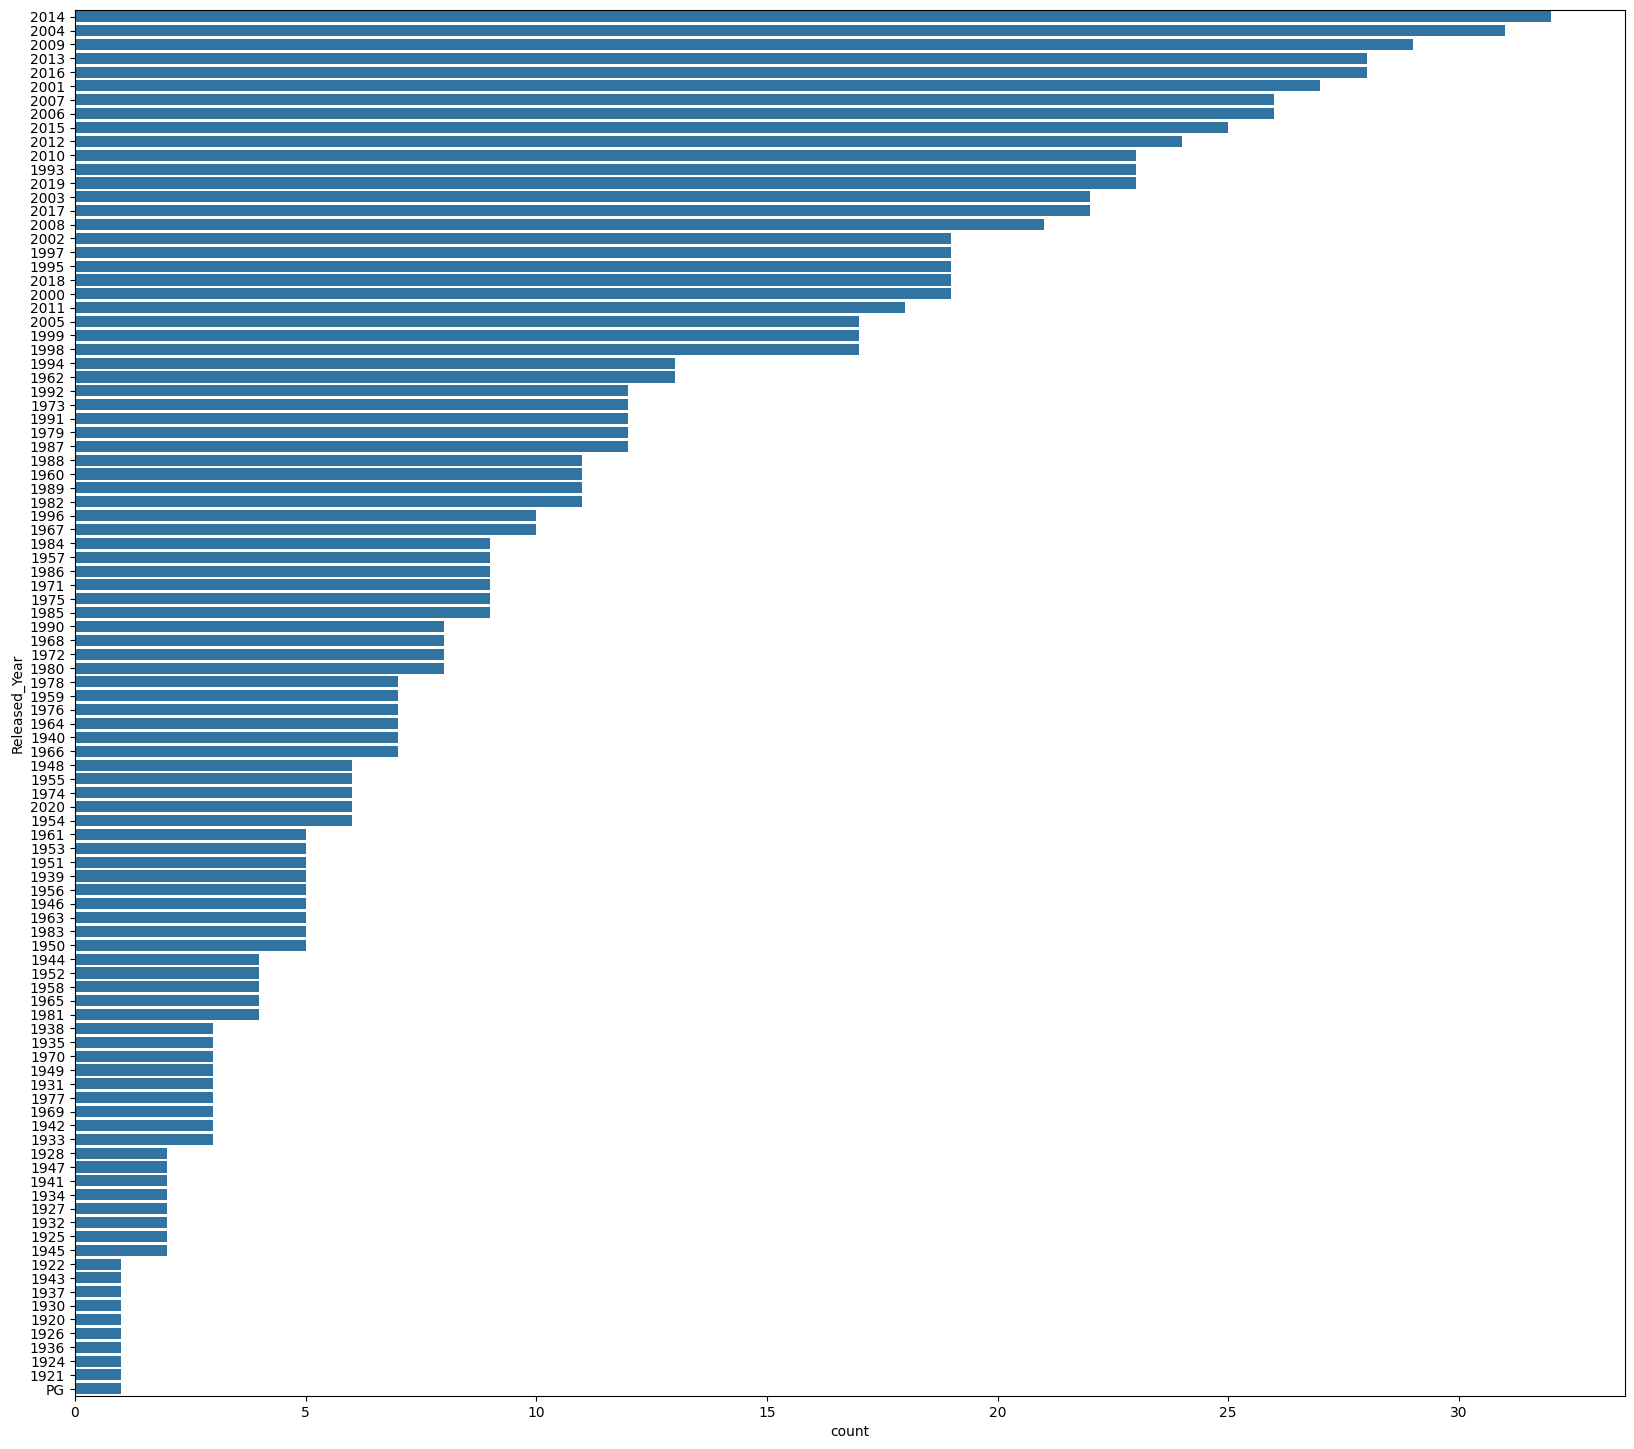

In [68]:


import seaborn as sns
plt.figure(figsize=(20,18))
sns.barplot(df['Released_Year'].value_counts(),orient='h')
plt.show()


In [69]:
data = df[['Series_Title','Director','Genre', 'Star1', 'Star2', 'Star3', 'Star4']]


In [70]:
data

,Series_Title,Director,Genre,Star1,Star2,Star3,Star4
0,The Shawshank Redemption,Frank Darabont,Drama,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler
1,The Godfather,Francis Ford Coppola,"Crime, Drama",Marlon Brando,Al Pacino,James Caan,Diane Keaton
2,The Dark Knight,Christopher Nolan,"Action, Crime, Drama",Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine
3,The Godfather: Part II,Francis Ford Coppola,"Crime, Drama",Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton
4,12 Angry Men,Sidney Lumet,"Crime, Drama",Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler
...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,Blake Edwards,"Comedy, Drama, Romance",Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen
996,Giant,George Stevens,"Drama, Western",Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker
997,From Here to Eternity,Fred Zinnemann,"Drama, Romance, War",Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed
998,Lifeboat,Alfred Hitchcock,"Drama, War",Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix


In [71]:
data.shape

(1000, 7)

In [72]:
df.isna().sum()

,0
Poster_Link,0
Series_Title,0
Released_Year,0
Certificate,101
Runtime,0
Genre,0
IMDB_Rating,0
Overview,0
Meta_score,157
Director,0


In [73]:
data['Genre'] = data['Genre'].str.replace(',',' ')

In [74]:
data

,Series_Title,Director,Genre,Star1,Star2,Star3,Star4
0,The Shawshank Redemption,Frank Darabont,Drama,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler
1,The Godfather,Francis Ford Coppola,Crime Drama,Marlon Brando,Al Pacino,James Caan,Diane Keaton
2,The Dark Knight,Christopher Nolan,Action Crime Drama,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine
3,The Godfather: Part II,Francis Ford Coppola,Crime Drama,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton
4,12 Angry Men,Sidney Lumet,Crime Drama,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler
...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,Blake Edwards,Comedy Drama Romance,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen
996,Giant,George Stevens,Drama Western,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker
997,From Here to Eternity,Fred Zinnemann,Drama Romance War,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed
998,Lifeboat,Alfred Hitchcock,Drama War,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix


In [75]:
df['Series_Title'][4]

'12 Angry Men'

In [76]:
# data.to_csv('data.csv',index=False)

# Part 2 preparation

In [77]:
# Create the Kaggle directory and copy your kaggle.json file there
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Set permissions for the kaggle.json file (optional, but recommended)
!chmod 600 ~/.kaggle/kaggle.json

# Download "The Movies Dataset" from Kaggle using its dataset identifier
!kaggle datasets download -d rounakbanik/the-movies-dataset

# Extract the downloaded ZIP file into the /content directory
import zipfile

zip_ref = zipfile.ZipFile('/content/the-movies-dataset.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset
License(s): CC0-1.0
the-movies-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


**we will use a the dataset**
#Credit.csv
#movies_metadata.csv

In [78]:
import pandas as pd
import numpy as np

movie  = pd.read_csv('/content/movies_metadata.csv')
credit = pd.read_csv('/content/credits.csv')

In [79]:
movie.head(1)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0


In [80]:
movie['release_date']  = pd.to_datetime(movie['release_date'],errors='coerce')

In [81]:
movie['year'] = movie['release_date'].dt.year
movie['year'].value_counts().sort_index()

,count
year,
1874.0,1
1878.0,1
1883.0,1
1887.0,1
1888.0,2
...,...
2015.0,1905
2016.0,1604
2017.0,532


#Movies Data of 2015

In [82]:
new_movie = movie.loc[movie['year'] == 2015,['title','genres','id','year']]
new_movie.head()

new_movie['id'] = new_movie['id'].astype(int)
data_p = pd.merge(new_movie,credit,on = 'id')
data_p.head()

data_p['Series_Title'] =data_p['title']
data_p.head()

import ast
data_p['genres'] = data_p['genres'].map(lambda x: ast.literal_eval(x))
data_p['cast'] = data_p['cast'].map(lambda x: ast.literal_eval(x))
data_p['crew'] = data_p['crew'].map(lambda x: ast.literal_eval(x))

def make_genreslist(x):
  gen = []
  st = " "
  for i in x:
    if i.get('name') == 'Science Fiction':
      scifi = 'Sci-Fi'
      gen.append(scifi)
    else:
      gen.append(i.get('name'))
  if gen == []:
      np.NAN
  else:
     return(st.join(gen))


data_p['Genre'] = data_p['genres'].map(lambda x: make_genreslist(x))
data_p['Genre']

def get_actor1(x):
  cast = []
  for i in x:
    cast.append(i.get('name'))
  if cast == []:
    return np.NAN
  else:
     return(cast[0])

data_p['Star1'] = data_p['cast'].map(lambda x: get_actor1(x))
data_p['Star1']

def get_actor2(x):
  cast = []
  for i in x:
    cast.append(i.get('name'))
  if cast == []or len(cast)<=1:
    return np.NAN
  else:
     return(cast[1])

data_p['Star2'] = data_p['cast'].map(lambda x: get_actor2(x))
data_p['Star2']
def get_actor3(x):
  cast = []
  for i in x:
    cast.append(i.get('name'))
  if cast == []or len(cast)<=2:
    return np.NAN
  else:
    return(cast[2])

data_p['Star3'] = data_p['cast'].map(lambda x: get_actor3(x))
data_p['Star3']

def get_actor4(x):
  cast = []
  for i in x:
    cast.append(i.get('name'))
  if cast == []or len(cast)<=3:
    return np.NAN
  else:
    return(cast[3])

data_p['Star4'] = data_p['cast'].map(lambda x: get_actor4(x))
data_p['Star4']

def get_director(x):
  dt = []
  st = " "
  for i in x:
    if i.get('job') == 'Director': #Fixed typo here
      dt.append(i.get('name'))
  if dt == []:
    return np.NAN
  else:
    return(st.join(dt))

data_p['Director'] = data_p['crew'].map(lambda x:get_director(x)    )
data_p['Director']

data_p2 = data_p[['Series_Title', 'Director', 'Genre', 'Star1', 'Star2', 'Star3', 'Star4']]
data = pd.concat([data, data_p], ignore_index=True)

data.head(1)
data.shape


(2907, 13)

#Movies Data of 2016

In [83]:
new_movie = movie.loc[movie['year'] == 2016,['title','genres','id','year']]
new_movie.head()

new_movie['id'] = new_movie['id'].astype(int)
data_p1 = pd.merge(new_movie,credit,on = 'id')
data_p1.head()

data_p1['Series_Title'] =data_p1['title']
data_p1.head()

import ast
data_p1['genres'] = data_p1['genres'].map(lambda x: ast.literal_eval(x))
data_p1['cast'] = data_p1['cast'].map(lambda x: ast.literal_eval(x))
data_p1['crew'] = data_p1['crew'].map(lambda x: ast.literal_eval(x))

def make_genreslist(x):
  gen = []
  st = " "
  for i in x:
    if i.get('name') == 'Science Fiction':
      scifi = 'Sci-Fi'
      gen.append(scifi)
    else:
      gen.append(i.get('name'))
  if gen == []:
      np.NAN
  else:
     return(st.join(gen))


data_p1['Genre'] = data_p1['genres'].map(lambda x: make_genreslist(x))
data_p1['Genre']

def get_actor1(x):
  cast = []
  for i in x:
    cast.append(i.get('name'))
  if cast == []:
    return np.NAN
  else:
     return(cast[0])

data_p1['Star1'] = data_p1['cast'].map(lambda x: get_actor1(x))
data_p1['Star1']

def get_actor2(x):
  cast = []
  for i in x:
    cast.append(i.get('name'))
  if cast == []or len(cast)<=1:
    return np.NAN
  else:
     return(cast[1])

data_p1['Star2'] = data_p1['cast'].map(lambda x: get_actor2(x))
data_p1['Star2']
def get_actor3(x):
  cast = []
  for i in x:
    cast.append(i.get('name'))
  if cast == []or len(cast)<=2:
    return np.NAN
  else:
    return(cast[2])

data_p1['Star3'] = data_p1['cast'].map(lambda x: get_actor3(x))
data_p1['Star3']

def get_actor4(x):
  cast = []
  for i in x:
    cast.append(i.get('name'))
  if cast == []or len(cast)<=3:
    return np.NAN
  else:
    return(cast[3])

data_p1['Star4'] = data_p1['cast'].map(lambda x: get_actor4(x))
data_p1['Star4']

def get_director(x):
  dt = []
  st = " "
  for i in x:
    if i.get('job') == 'Director': #Fixed typo here
      dt.append(i.get('name'))
  if dt == []:
    return np.NAN
  else:
    return(st.join(dt))

data_p1['Director'] = data_p1['crew'].map(lambda x:get_director(x)    )
data_p1['Director']

data_p1 = data_p[['Series_Title', 'Director', 'Genre', 'Star1', 'Star2', 'Star3', 'Star4']]
data = pd.concat([data, data_p1], ignore_index=True)

data.head(1)
data.shape


(4814, 13)

#Movies Data of 2017

In [84]:
new_movie = movie.loc[movie['year'] == 2017,['title','genres','id','year']]
new_movie.head()

new_movie['id'] = new_movie['id'].astype(int)
data_p2 = pd.merge(new_movie,credit,on = 'id')
data_p2.head()

data_p2['Series_Title'] =data_p2['title']
data_p2.head()

import ast
data_p2['genres'] = data_p2['genres'].map(lambda x: ast.literal_eval(x))
data_p2['cast'] = data_p2['cast'].map(lambda x: ast.literal_eval(x))
data_p2['crew'] = data_p2['crew'].map(lambda x: ast.literal_eval(x))

def make_genreslist(x):
  gen = []
  st = " "
  for i in x:
    if i.get('name') == 'Science Fiction':
      scifi = 'Sci-Fi'
      gen.append(scifi)
    else:
      gen.append(i.get('name'))
  if gen == []:
      np.NAN
  else:
     return(st.join(gen))


data_p2['Genre'] = data_p2['genres'].map(lambda x: make_genreslist(x))
data_p2['Genre']

def get_actor1(x):
  cast = []
  for i in x:
    cast.append(i.get('name'))
  if cast == []:
    return np.NAN
  else:
     return(cast[0])

data_p2['Star1'] = data_p2['cast'].map(lambda x: get_actor1(x))
data_p2['Star1']

def get_actor2(x):
  cast = []
  for i in x:
    cast.append(i.get('name'))
  if cast == []or len(cast)<=1:
    return np.NAN
  else:
     return(cast[1])

data_p2['Star2'] = data_p2['cast'].map(lambda x: get_actor2(x))
data_p2['Star2']
def get_actor3(x):
  cast = []
  for i in x:
    cast.append(i.get('name'))
  if cast == []or len(cast)<=2:
    return np.NAN
  else:
    return(cast[2])

data_p2['Star3'] = data_p2['cast'].map(lambda x: get_actor3(x))
data_p2['Star3']

def get_actor4(x):
  cast = []
  for i in x:
    cast.append(i.get('name'))
  if cast == []or len(cast)<=3:
    return np.NAN
  else:
    return(cast[3])

data_p2['Star4'] = data_p2['cast'].map(lambda x: get_actor4(x))
data_p2['Star4']

def get_director(x):
  dt = []
  st = " "
  for i in x:
    if i.get('job') == 'Director': #Fixed typo here
      dt.append(i.get('name'))
  if dt == []:
    return np.NAN
  else:
    return(st.join(dt))

data_p2['Director'] = data_p2['crew'].map(lambda x:get_director(x)    )
data_p2['Director']

data_p2 = data_p2[['Series_Title', 'Director', 'Genre', 'Star1', 'Star2', 'Star3', 'Star4']]
data = pd.concat([data, data_p2], ignore_index=True)

data.head(1)
data.shape


(5345, 13)

In [85]:
data.isna().sum()

,0
Series_Title,0
Director,80
Genre,105
Star1,264
Star2,487
Star3,600
Star4,706
title,3438
genres,3438
id,3438


In [86]:
data = data.dropna(how='any')

In [87]:
data.isna().sum()

,0
Series_Title,0
Director,0
Genre,0
Star1,0
Star2,0
Star3,0
Star4,0
title,0
genres,0
id,0


In [88]:
data.shape

(1554, 13)

In [89]:
data['Series_Title'] =data['Series_Title'].str.lower()

In [90]:
data.head()

,Series_Title,Director,Genre,Star1,Star2,Star3,Star4,title,genres,id,year,cast,crew
1000,mission: impossible - rogue nation,Christopher McQuarrie,Action Adventure Thriller,Tom Cruise,Rebecca Ferguson,Simon Pegg,Jeremy Renner,Mission: Impossible - Rogue Nation,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",177677.0,2015.0,"[{'cast_id': 1, 'character': 'Ethan Hunt', 'cr...","[{'credit_id': '550effb5c3a3683e7f002f43', 'de..."
1001,jupiter ascending,Lilly Wachowski Lana Wachowski,Sci-Fi Fantasy Action Adventure,Mila Kunis,Channing Tatum,Sean Bean,Eddie Redmayne,Jupiter Ascending,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",76757.0,2015.0,"[{'cast_id': 6, 'character': 'Jupiter Jones', ...","[{'credit_id': '5535bb999251414716001979', 'de..."
1002,ex machina,Alex Garland,Drama Sci-Fi,Domhnall Gleeson,Alicia Vikander,Oscar Isaac,Sonoya Mizuno,Ex Machina,"[{'id': 18, 'name': 'Drama'}, {'id': 878, 'nam...",264660.0,2015.0,"[{'cast_id': 1, 'character': 'Caleb Smith', 'c...","[{'credit_id': '5535b633c3a368523e004fe5', 'de..."
1003,"kumiko, the treasure hunter",David Zellner,Drama,Rinko Kikuchi,Nobuyuki Katsube,Shirley Venard,David Zellner,"Kumiko, the Treasure Hunter","[{'id': 18, 'name': 'Drama'}]",244563.0,2015.0,"[{'cast_id': 5, 'character': 'Kumiko', 'credit...","[{'credit_id': '52fe4ef4c3a36847f82b3261', 'de..."
1004,in the heart of the sea,Ron Howard,Thriller Drama Adventure Action History,Chris Hemsworth,Benjamin Walker,Cillian Murphy,Brendan Gleeson,In the Heart of the Sea,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",205775.0,2015.0,"[{'cast_id': 2, 'character': 'Owen Chase', 'cr...","[{'credit_id': '52fe4d0fc3a368484e1d4dd9', 'de..."


In [91]:
data['comb'] = data['Star1']+' '+data['Star2']+' '+data['Star3']+' '+data['Star4']+' '+data['Genre']

In [92]:
data

,Series_Title,Director,Genre,Star1,Star2,Star3,Star4,title,genres,id,year,cast,crew,comb
1000,mission: impossible - rogue nation,Christopher McQuarrie,Action Adventure Thriller,Tom Cruise,Rebecca Ferguson,Simon Pegg,Jeremy Renner,Mission: Impossible - Rogue Nation,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",177677.0,2015.0,"[{'cast_id': 1, 'character': 'Ethan Hunt', 'cr...","[{'credit_id': '550effb5c3a3683e7f002f43', 'de...",Tom Cruise Rebecca Ferguson Simon Pegg Jeremy ...
1001,jupiter ascending,Lilly Wachowski Lana Wachowski,Sci-Fi Fantasy Action Adventure,Mila Kunis,Channing Tatum,Sean Bean,Eddie Redmayne,Jupiter Ascending,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",76757.0,2015.0,"[{'cast_id': 6, 'character': 'Jupiter Jones', ...","[{'credit_id': '5535bb999251414716001979', 'de...",Mila Kunis Channing Tatum Sean Bean Eddie Redm...
1002,ex machina,Alex Garland,Drama Sci-Fi,Domhnall Gleeson,Alicia Vikander,Oscar Isaac,Sonoya Mizuno,Ex Machina,"[{'id': 18, 'name': 'Drama'}, {'id': 878, 'nam...",264660.0,2015.0,"[{'cast_id': 1, 'character': 'Caleb Smith', 'c...","[{'credit_id': '5535b633c3a368523e004fe5', 'de...",Domhnall Gleeson Alicia Vikander Oscar Isaac S...
1003,"kumiko, the treasure hunter",David Zellner,Drama,Rinko Kikuchi,Nobuyuki Katsube,Shirley Venard,David Zellner,"Kumiko, the Treasure Hunter","[{'id': 18, 'name': 'Drama'}]",244563.0,2015.0,"[{'cast_id': 5, 'character': 'Kumiko', 'credit...","[{'credit_id': '52fe4ef4c3a36847f82b3261', 'de...",Rinko Kikuchi Nobuyuki Katsube Shirley Venard ...
1004,in the heart of the sea,Ron Howard,Thriller Drama Adventure Action History,Chris Hemsworth,Benjamin Walker,Cillian Murphy,Brendan Gleeson,In the Heart of the Sea,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",205775.0,2015.0,"[{'cast_id': 2, 'character': 'Owen Chase', 'cr...","[{'credit_id': '52fe4d0fc3a368484e1d4dd9', 'de...",Chris Hemsworth Benjamin Walker Cillian Murphy...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2901,baby bump,Kuba Czekaj,Comedy Drama,Kacper Olszewski,Agnieszka Podsiadlik,Caryl Swift,Sebastian Łach,Baby Bump,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",358511.0,2015.0,"[{'cast_id': 1, 'character': 'Mickey House', '...","[{'credit_id': '55ec9e6d9251413e350109c3', 'de...",Kacper Olszewski Agnieszka Podsiadlik Caryl Sw...
2902,how most things work,Fernando Salem,Drama,Verónica Gerez,Pilar Gamboa,Rafael Spregelburd,Esteban Bigliardi,How Most Things Work,"[{'id': 18, 'name': 'Drama'}]",374764.0,2015.0,"[{'cast_id': 0, 'character': 'Celina', 'credit...","[{'credit_id': '56822224c3a3684be30136a3', 'de...",Verónica Gerez Pilar Gamboa Rafael Spregelburd...
2904,the sublet,John Ainslie,Mystery Drama Thriller Horror,Tianna Nori,Mark Matechuk,Krista Madison,Porter Randell,The Sublet,"[{'id': 9648, 'name': 'Mystery'}, {'id': 18, '...",365432.0,2015.0,"[{'cast_id': 1, 'character': 'Joanna', 'credit...","[{'credit_id': '562e344bc3a3681b5c00ab29', 'de...",Tianna Nori Mark Matechuk Krista Madison Porte...
2905,"blood, sweat and tears",Diederick Koopal,Drama,Martijn Fischer,Hadewych Minis,Fedja van Huêt,Loek Peters,"Blood, Sweat and Tears","[{'id': 18, 'name': 'Drama'}]",327237.0,2015.0,"[{'cast_id': 2, 'character': 'André Hazes', 'c...","[{'credit_id': '54edb0e0c3a3686d58003a13', 'de...",Martijn Fischer Hadewych Minis Fedja van Huêt ...


In [93]:
data.drop_duplicates(subset=['Series_Title'], keep='last', inplace=True)

In [94]:
data

,Series_Title,Director,Genre,Star1,Star2,Star3,Star4,title,genres,id,year,cast,crew,comb
1000,mission: impossible - rogue nation,Christopher McQuarrie,Action Adventure Thriller,Tom Cruise,Rebecca Ferguson,Simon Pegg,Jeremy Renner,Mission: Impossible - Rogue Nation,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",177677.0,2015.0,"[{'cast_id': 1, 'character': 'Ethan Hunt', 'cr...","[{'credit_id': '550effb5c3a3683e7f002f43', 'de...",Tom Cruise Rebecca Ferguson Simon Pegg Jeremy ...
1001,jupiter ascending,Lilly Wachowski Lana Wachowski,Sci-Fi Fantasy Action Adventure,Mila Kunis,Channing Tatum,Sean Bean,Eddie Redmayne,Jupiter Ascending,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",76757.0,2015.0,"[{'cast_id': 6, 'character': 'Jupiter Jones', ...","[{'credit_id': '5535bb999251414716001979', 'de...",Mila Kunis Channing Tatum Sean Bean Eddie Redm...
1002,ex machina,Alex Garland,Drama Sci-Fi,Domhnall Gleeson,Alicia Vikander,Oscar Isaac,Sonoya Mizuno,Ex Machina,"[{'id': 18, 'name': 'Drama'}, {'id': 878, 'nam...",264660.0,2015.0,"[{'cast_id': 1, 'character': 'Caleb Smith', 'c...","[{'credit_id': '5535b633c3a368523e004fe5', 'de...",Domhnall Gleeson Alicia Vikander Oscar Isaac S...
1003,"kumiko, the treasure hunter",David Zellner,Drama,Rinko Kikuchi,Nobuyuki Katsube,Shirley Venard,David Zellner,"Kumiko, the Treasure Hunter","[{'id': 18, 'name': 'Drama'}]",244563.0,2015.0,"[{'cast_id': 5, 'character': 'Kumiko', 'credit...","[{'credit_id': '52fe4ef4c3a36847f82b3261', 'de...",Rinko Kikuchi Nobuyuki Katsube Shirley Venard ...
1004,in the heart of the sea,Ron Howard,Thriller Drama Adventure Action History,Chris Hemsworth,Benjamin Walker,Cillian Murphy,Brendan Gleeson,In the Heart of the Sea,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",205775.0,2015.0,"[{'cast_id': 2, 'character': 'Owen Chase', 'cr...","[{'credit_id': '52fe4d0fc3a368484e1d4dd9', 'de...",Chris Hemsworth Benjamin Walker Cillian Murphy...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2901,baby bump,Kuba Czekaj,Comedy Drama,Kacper Olszewski,Agnieszka Podsiadlik,Caryl Swift,Sebastian Łach,Baby Bump,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",358511.0,2015.0,"[{'cast_id': 1, 'character': 'Mickey House', '...","[{'credit_id': '55ec9e6d9251413e350109c3', 'de...",Kacper Olszewski Agnieszka Podsiadlik Caryl Sw...
2902,how most things work,Fernando Salem,Drama,Verónica Gerez,Pilar Gamboa,Rafael Spregelburd,Esteban Bigliardi,How Most Things Work,"[{'id': 18, 'name': 'Drama'}]",374764.0,2015.0,"[{'cast_id': 0, 'character': 'Celina', 'credit...","[{'credit_id': '56822224c3a3684be30136a3', 'de...",Verónica Gerez Pilar Gamboa Rafael Spregelburd...
2904,the sublet,John Ainslie,Mystery Drama Thriller Horror,Tianna Nori,Mark Matechuk,Krista Madison,Porter Randell,The Sublet,"[{'id': 9648, 'name': 'Mystery'}, {'id': 18, '...",365432.0,2015.0,"[{'cast_id': 1, 'character': 'Joanna', 'credit...","[{'credit_id': '562e344bc3a3681b5c00ab29', 'de...",Tianna Nori Mark Matechuk Krista Madison Porte...
2905,"blood, sweat and tears",Diederick Koopal,Drama,Martijn Fischer,Hadewych Minis,Fedja van Huêt,Loek Peters,"Blood, Sweat and Tears","[{'id': 18, 'name': 'Drama'}]",327237.0,2015.0,"[{'cast_id': 2, 'character': 'André Hazes', 'c...","[{'credit_id': '54edb0e0c3a3686d58003a13', 'de...",Martijn Fischer Hadewych Minis Fedja van Huêt ...


In [95]:
data.to_csv('data_combin.csv',index=False)

# Part 4